### T Test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.



One-sample T-test with Python

The test will tell us whether means of the sample and the population are different


In [1]:
import seaborn as sns
sns.set(color_codes=True)

sns.set(rc={'figure.figsize':(5,5)})

In [2]:
ages=[22,27,28,16,29,31,34,21,35,36,38,39,40,41,42,44,46]

In [3]:
len(ages)

17

In [4]:
import numpy as np
ag_mean=np.mean(ages)
ag_mean

33.470588235294116

In [5]:
#taking a sample
sample_size=10
age_samp=np.random.choice(ages,sample_size)

In [6]:
age_samp

array([28, 29, 34, 31, 22, 21, 35, 35, 27, 44])

In [7]:
from scipy.stats import ttest_1samp
#to perfom 1 sample t test

In [8]:
ttest,p_value=ttest_1samp(age_samp,33)   #if same as population and sample then p value will be less than 0.05

In [9]:
print(p_value)

0.2945075647652987


In [10]:
if p_value>0.05:
    print("cant Reject null hypothesis")
else:
    print("Null Hypo rejected")
    

cant Reject null hypothesis


53.0294


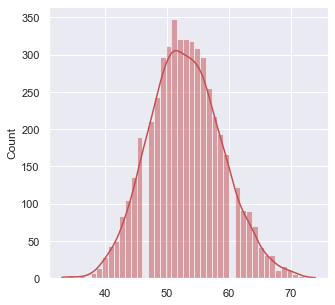

In [11]:
from scipy.stats import poisson
import math
clg_age=poisson.rvs(size=5000,loc=18,mu=35)
cls_age=poisson.rvs(size=60,loc=18,mu=30)
sns.histplot(clg_age,kde=True,color='r')
print(clg_age.mean())

48.35


<AxesSubplot:ylabel='Count'>

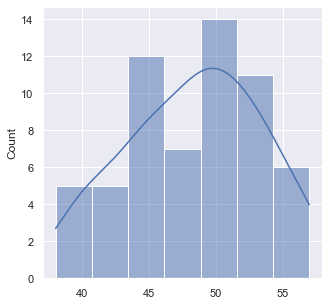

In [12]:
print(cls_age.mean())
sns.histplot(cls_age,kde=True)

In [13]:
from scipy.stats import ttest_1samp

In [14]:
ttest,p_value=ttest_1samp(a=cls_age,popmean=clg_age.mean())  
#a is sample observation and popmean=population mean

In [15]:
print(p_value)

9.71914423763223e-10


In [16]:
if p_value>0.05:
    print("cant Reject null hypothesis")
else:
    print("Null Hypo rejected")

Null Hypo rejected


In [17]:
(1.3652799983974874e-12)>0.05

False

### Two-sample T-test With Python

The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

In [18]:
classB_ages=poisson.rvs(loc=18,mu=33,size=60)
print(classB_ages.mean())

50.11666666666667


<AxesSubplot:ylabel='Count'>

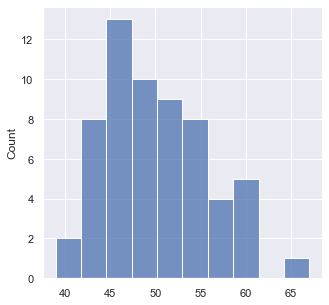

In [19]:
sns.histplot(classB_ages)

In [21]:
from scipy.stats import ttest_ind

In [25]:
p_value,ttest=ttest_ind(a=cls_age,b=classB_ages)
print(p_value)

-1.8069734179185029


In [27]:
if p_value<0.05:
    print("End of Null Hypo")
else:
    print("Null Hypo is there")

End of Null Hypo


### Paired T-test With Python

When you want to check how different samples from the same group are, you can go for a paired T-test

In [30]:
from scipy.stats import norm

In [31]:
weight=[22,12,24,25,26,23,27,24,28,30]
w2=weight+norm.rvs(scale=5,loc=1.25,size=10)     #size 10 due to weight is 10

In [32]:
print(weight)
print(w2)

[22, 12, 24, 25, 26, 23, 27, 24, 28, 30]
[23.36043516 18.7187578  25.85261851 24.54997871 22.37111569 21.12108329
 24.92214649 28.1555055  34.86112322 29.57751809]


In [36]:
weight_df=pd.DataFrame({"weight_10":np.array(weight),
          "weight_20":np.array(w2),
          "weight_change":np.array(w2)-np.array(weight)})

<IPython.core.display.Javascript object>

In [37]:
weight_df

,weight_10,weight_20,weight_change
0,22,23.360435,1.360435
1,12,18.718758,6.718758
2,24,25.852619,1.852619
3,25,24.549979,-0.450021
4,26,22.371116,-3.628884
5,23,21.121083,-1.878917
6,27,24.922146,-2.077854
7,24,28.155505,4.155505
8,28,34.861123,6.861123
9,30,29.577518,-0.422482


In [38]:
from scipy.stats import ttest_rel     #to calculate relation of same samples of same group

In [39]:
ttest,p_value=ttest_rel(a=weight,b=w2)

In [40]:
print(p_value)

0.3085900104956331


In [43]:
#if there was maximum difference between this a and b we will be able to rejct null hypo
if p_value>0.05:
    print("Accpt null hyp")
else:
    print("Reject null hypo")

Accpt null hyp
